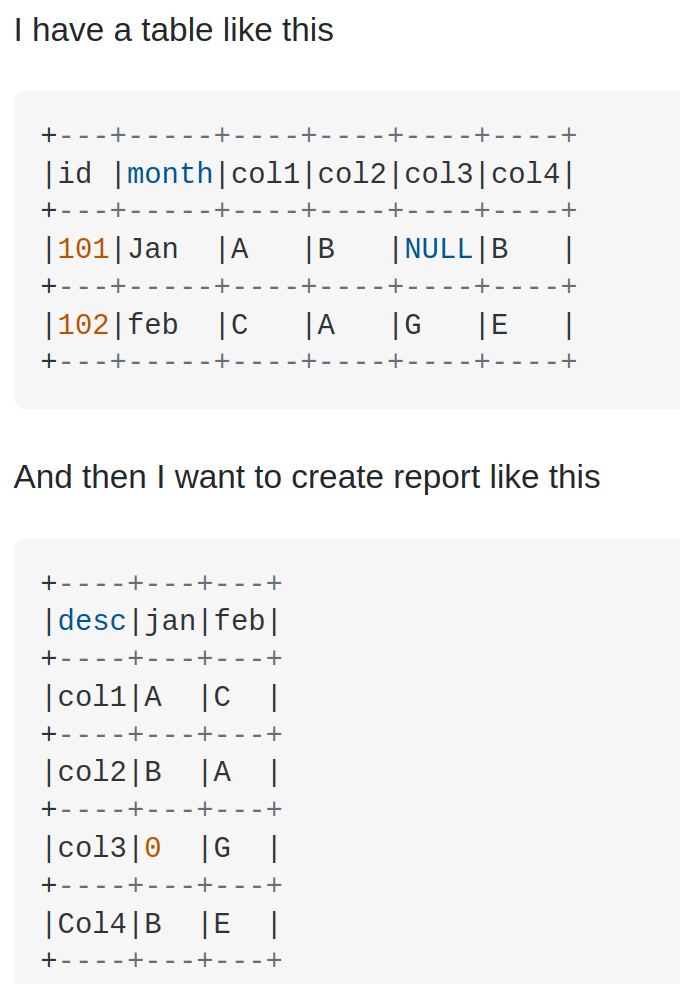

In [17]:
from IPython.display import Image
Image("/media/bruceashbee/storage drive1/photo_for_notes/column to row.png")

### What you need to do is first, unpivot the data and then pivot it. But unfortunately MySQL does not have these functions so you will need to replicate them using a UNION ALL query for the unpivot and an aggregate function with a CASE for the pivot.

### The unpivot or UNION ALL piece takes the data from your col1, col2, etc and turns it into multiple rows

In [18]:
import mysql.connector as sql
import pandas as pd

mydb = sql.connect (
    host = "localhost",
    user = "root",
    password = "ZAQs8271911c$",
    auth_plugin='mysql_native_password',
    buffered = True,          # using this for reading table, panda dont need it
    #multi=True,                 # if wanna use mulitple query
    database = "sql_fr_ai"
)
#! create table
mycoursor = mydb.cursor()
sql_query = """

DROP TABLE column_to_row_practice;

;

 """
mycoursor.execute(sql_query)

In [19]:
import mysql.connector as sql
import pandas as pd

mydb = sql.connect (
    host = "localhost",
    user = "root",
    password = "ZAQs8271911c$",
    auth_plugin='mysql_native_password',
    buffered = True,          # using this for reading table, panda dont need it
    #multi=True,                 # if wanna use mulitple query
    database = "sql_fr_ai"
)
#! create table
mycoursor = mydb.cursor()
sql_query = """

CREATE TABLE if not exists column_to_row_practice
	(`id` int, 
    `month` varchar(3), 
    `col1` varchar(1), 
    `col2` varchar(1), 
    `col3` varchar(4), 
    `col4` varchar(1))

 """
mycoursor.execute(sql_query)

In [20]:
#! insert values

mycoursor = mydb.cursor()
sql_query = """

INSERT INTO column_to_row_practice
VALUES
			(101, 'Jan', 'A', 'B', NULL, 'B'),
			(102, 'feb', 'C', 'A', 'G', 'E')
 """
mycoursor.execute(sql_query)

In [24]:

#! check table and values

sql_query = """
SELECT
            *
FROM 
            column_to_row_practice
"""

df = pd.read_sql_query(
    sql_query,
    mydb)


df

,id,month,col1,col2,col3,col4
0,101,Jan,A,B,None,B
1,102,feb,C,A,G,E


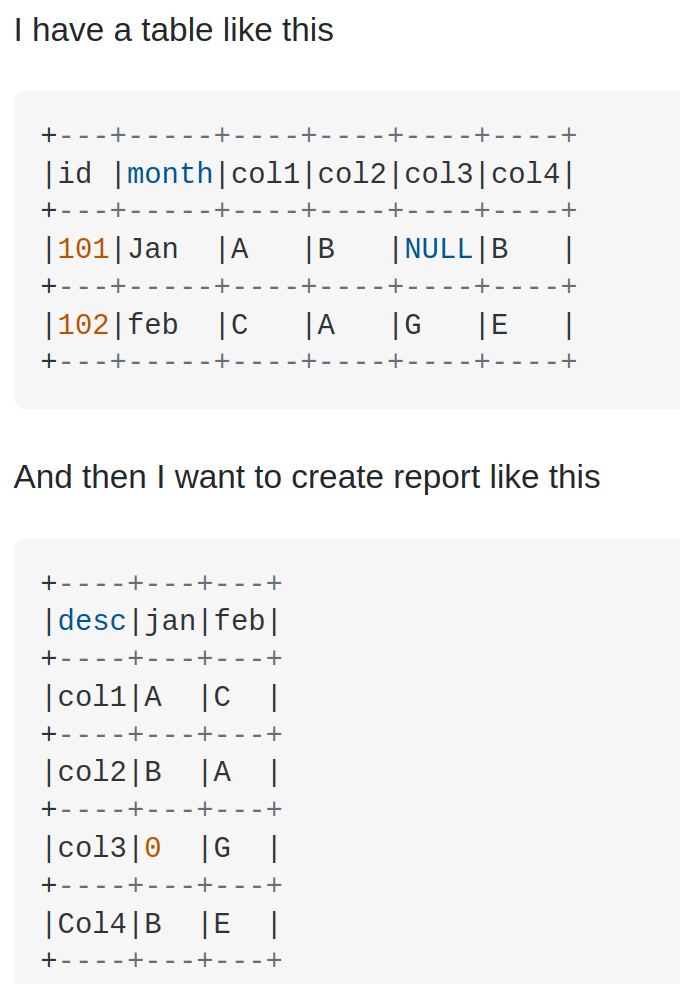

In [22]:
from IPython.display import Image
Image("/media/bruceashbee/storage drive1/photo_for_notes/column to row.png")

# SYNTAX
```
select 
            id, month, col1 value, 'col1' descrip 
from 
            column_to_row_practice
union all
            select 
                        id, month, col2 value, 'col2' descrip
            from 
                        column_to_row_practice
union all
            select 
                        id, month, col3 value, 'col3' descrip
            from 
                        column_to_row_practice
union all
            select id, month, col4 value, 'col4' descrip
            from 
                    column_to_row_practice
```

In [23]:

#! check table and values

sql_query = """
select 
            id, month, col1 value, 'col1' descrip 
from 
            column_to_row_practice
union all
            select 
                        id, month, col2 value, 'col2' descrip
            from 
                        column_to_row_practice
union all
            select 
                        id, month, col3 value, 'col3' descrip
            from 
                        column_to_row_practice
union all
            select id, month, col4 value, 'col4' descrip
            from 
                    column_to_row_practice
"""

df = pd.read_sql_query(
    sql_query,
    mydb)


df

,id,month,value,descrip
0,101,Jan,A,col1
1,102,feb,C,col1
2,101,Jan,B,col2
3,102,feb,A,col2
4,101,Jan,None,col3
5,102,feb,G,col3
6,101,Jan,B,col4
7,102,feb,E,col4
